In [320]:
import pandas as pd
data = pd.read_csv("./titanic_train.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [321]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

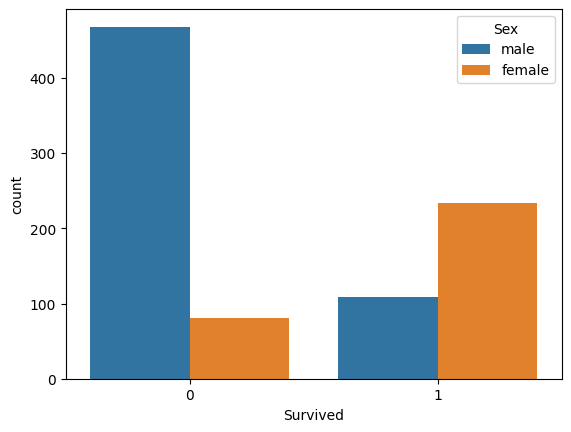

In [322]:
import seaborn as sb
sb.countplot(x="Survived", hue="Sex", data=data)

In [323]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

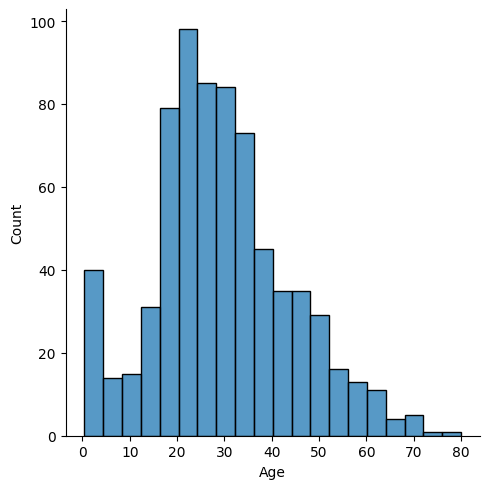

In [324]:
sb.displot(x="Age", data=data)

In [325]:
data["Age"].mean()

29.69911764705882

In [326]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [327]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [328]:
data = data.dropna()


In [329]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [330]:
data = data.drop(["Name", "PassengerId", "Ticket", "Cabin"], axis=1)

In [331]:
sex_dummies = pd.get_dummies(data["Sex"], drop_first=True, dtype=int)
data = data.join(sex_dummies)
data = data.drop(["Sex"],axis=1)

<Axes: xlabel='Survived', ylabel='count'>

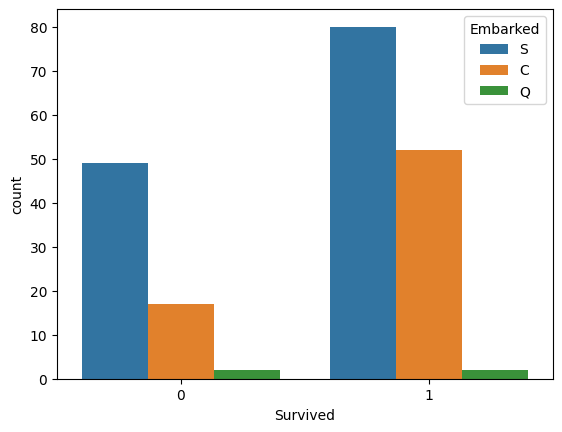

In [332]:
sb.countplot(x="Survived", data=data, hue="Embarked")

In [333]:
embarked_dummies = pd.get_dummies(data["Embarked"], drop_first=True, dtype=int)
embarked_dummies
data = data.join(embarked_dummies)
data = data.drop(["Embarked"], axis=1)

<Axes: >

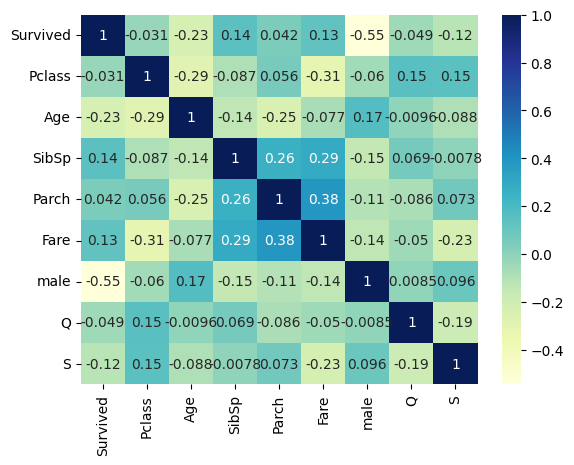

In [334]:
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<Axes: xlabel='Survived', ylabel='count'>

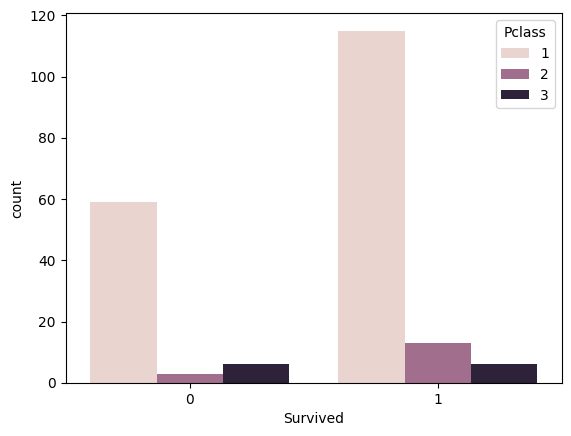

In [335]:
sb.countplot(x="Survived", data=data, hue="Pclass")

In [338]:
x = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [339]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [341]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)


LogisticRegression(max_iter=10000)

In [342]:
predictions = model.predict(x_test)

In [343]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7317073170731707

In [344]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.82      0.79      0.81        29

    accuracy                           0.73        41
   macro avg       0.68      0.69      0.68        41
weighted avg       0.74      0.73      0.73        41



In [346]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, predictions)

array([[ 7,  5],
       [ 6, 23]])

In [347]:
pd.DataFrame(confusion_matrix(y_test, predictions), columns=["Pred: NO", "Pred: Yes"], index=["Real: No", "Real: Yes"])

,Pred: NO,Pred: Yes
Real: No,7,5
Real: Yes,6,23


In [348]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,38.0,1,0,71.2833,0,0,0
3,1,35.0,1,0,53.1000,0,0,1
6,1,54.0,0,0,51.8625,1,0,1
10,3,4.0,1,1,16.7000,0,0,1
11,1,58.0,0,0,26.5500,0,0,1


In [356]:
new_passenger = [2, 26, 0, 0, 100, 1, 1,0]
survived = model.predict([new_passenger])

if survived[0] == 1:
    print("Yay!")
else:
    print("Nay!")

Nay!


/Users/juanjose/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
